# Final Notebook 002 - Data Analysis (Mutual Information and Company-wide Clustering)

## Import

In [2]:
import sentisignal
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
import numpy as np 
import pylab as P 
import ast
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import scipy.stats as s
import statsmodels.api as sm
import pprint
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from datetime import datetime
from yahoo_finance import Share
from pandas_datareader import data, wb
from statsmodels.graphics.api import qqplot
from operator import itemgetter
from decimal import *
from sklearn.neighbors.kde import KernelDensity

# plt.style.use('ggplot')
# sns.set_style("darkgrid")
# sns.set_context("notebook")

## Configuration

In [4]:
data_primary_path = '../../data/csv/stocktwits_twitter_withretweets_daily.csv'
data_symbology_path = '../../data/csv/symbology.csv'
data_pickles_path = '../../data/pickles/'
data_nasdaq_company_list_path = '../../data/nasdaq/companylist.csv'
start_date = '2012-01-01'
end_date = '2016-01-01'

## Reload Data

In [5]:
data_symbology = pd.read_csv(data_symbology_path)

### Use NASDAQ data to get top 250 companies by MarketCap

In [7]:
data_nasdaq_company_list = pd.read_csv(data_nasdaq_company_list_path)
data_nasdaq_top_250_mkt_cap = data_nasdaq_company_list.head(250)
data_nasdaq_top_250_mkt_cap_symbols = data_nasdaq_top_250_mkt_cap['Symbol'].unique()

### Load results from intermediate pickle

In [8]:
data_nasdaq_top_250_preprocessed_merge = pd.read_pickle(data_pickles_path+'intermediate/'+'data_nasdaq_top_250_preprocessed_merge_'+start_date+'_'+end_date)

### Load window results from intermediate pickle

In [9]:
data_nasdaq_top_250_preprocessed_merge_window_30 = pd.read_pickle(data_pickles_path+'intermediate/'+'data_nasdaq_top_250_preprocessed_merge_'+start_date+'_'+end_date+'_window_30')
data_nasdaq_top_250_preprocessed_merge_window_10 = pd.read_pickle(data_pickles_path+'intermediate/'+'data_nasdaq_top_250_preprocessed_merge_'+start_date+'_'+end_date+'_window_10')

## Data Analytics (No window)

## Count time series

In [11]:
print "Minimum time series length: ", data_nasdaq_top_250_preprocessed_merge.groupby(['SYMBOL']).apply(len).min()
print "Maximum time series length: ", data_nasdaq_top_250_preprocessed_merge.groupby(['SYMBOL']).apply(len).max()

 Minimum time series length:  6
Maximum time series length:  1008


### MI (Mutual Information)

#### MI (Validate: More leading than trailing)

#### Show example of more trailing than leading (invalid)

In [85]:
## ex-ante
merge_mi_res = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge, 'SYMBOL', sentisignal.information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1, True)
# ex-post
merge_mi_res_validate = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge, 'SYMBOL', sentisignal.information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1, False)

error with mi calc 0
error with mi calc math domain error
error with mi calc math domain error
error with mi calc cannot convert float NaN to integer
error with mi calc cannot convert float NaN to integer
error with mi calc 0
error with mi calc math domain error
error with mi calc math domain error


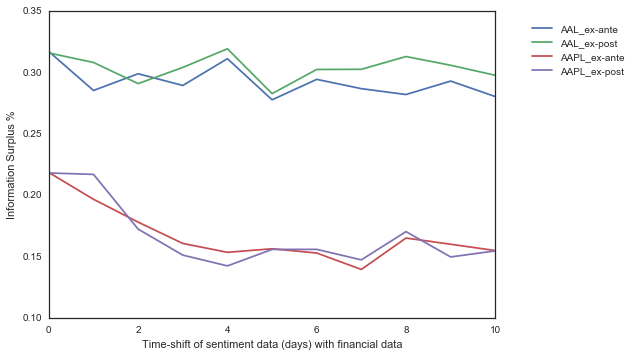

In [98]:
sentisignal.plot_lead_trail_res(merge_mi_res, merge_mi_res_validate, ['AAL', 'AAPL'])

#### Net Information Surplus

error with mi calc 0
error with mi calc math domain error
error with mi calc math domain error
error with mi calc cannot convert float NaN to integer
error with mi calc cannot convert float NaN to integer
error with mi calc 0
error with mi calc math domain error
error with mi calc math domain error
length prior to constrain 236
length after to constrain 35
ACGL
ACWI
AMTD
CINF
COST
CSCO
ERIE
FAST
FITB
HAS
JKHY
KHC
LBRDA
LBTYB
LILA
LILAK
LMCB
MAR
MIDD
MNST
MRKT
NWS
PBCT
PPC
QQQ
SCZ
SHPG
SYMC
TEAM
TRMB
VCIT
VCSH
VIP
VXUS
ZG
length after to test 32


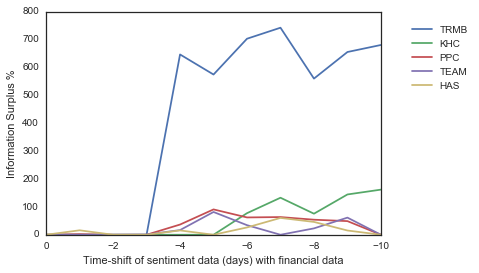

In [21]:
merge_net_mi_res = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'PCA_SENTIMENT', 'PCA_FINANCE', -1)
merge_net_mi_res_constr = sentisignal.constrain_mi_res(merge_net_mi_res)
merge_net_mi_res_test = sentisignal.constrain_test_significant(merge_net_mi_res_constr, data_nasdaq_top_250_preprocessed_merge, 'PCA_SENTIMENT', 'PCA_FINANCE')
sentisignal.plot_inf_res(merge_net_mi_res_test, plot_top=5, time_shift=10)
mi_pca_sent_pca_fin = merge_net_mi_res_test


error with mi calc cannot convert float NaN to integer
error with mi calc 0
error with mi calc math domain error
error with mi calc math domain error
error with mi calc cannot convert float NaN to integer
error with mi calc cannot convert float NaN to integer
error with mi calc 0
error with mi calc math domain error
error with mi calc math domain error
length prior to constrain 236
length after to constrain 103
AAL
ACGL
ACWI
ADP
AMTD
ANSS
ASML
BBBY
BEAV
CA
CACC
CBOE
CERN
CG
CINF
COST
CSCO
CSX
CTAS
DISCA
DISCB
DISCK
DOX
EA
EQIX
ERIE
EWBC
EXPD
FANG
FB
FITB
FLEX
FOXA
FTNT
GOOG
HAS
HBAN
HOLX
HSIC
IBKR
INTU
JBHT
JD
JKHY
KHC
LBRDA
LBTYB
LBTYK
LILA
LILAK
LKQ
LLTC
LMCA
LMCB
LVNTA
MANH
MAR
MNST
MRKT
NDAQ
NDSN
NTAP
NWS
ORLY
PACW
PAYX
PBCT
PDCO
PPC
QCOM
QGEN
QVCA
RYAAY
SABR
SATS
SBNY
SCZ
SEIC
SHPG
SIVB
SNPS
SRCL
SSNC
SYMC
TEAM
TFSL
TRMB
TROW
UHAL
VCIT
VCSH
VIA
VIP
VOD
VRSK
VXUS
WDC
WFM
WOOF
XLNX
XRAY
ZG
ZION
length after to test 102


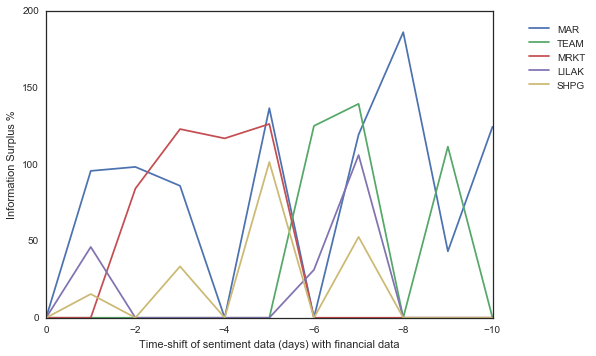

In [31]:
merge_net_mi_res = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'PCA_SENTIMENT_CHANGE', 'PCA_FINANCE_CHANGE', -1)
merge_net_mi_res_constr = sentisignal.constrain_mi_res(merge_net_mi_res)
merge_net_mi_res_test = sentisignal.constrain_test_significant(merge_net_mi_res_constr, data_nasdaq_top_250_preprocessed_merge, 'PCA_SENTIMENT_CHANGE', 'PCA_FINANCE_CHANGE')
sentisignal.plot_inf_res(merge_net_mi_res_test, plot_top=5, time_shift=10)
mi_pca_sent_change_pca_fin_change = merge_net_mi_res_test


error with mi calc cannot convert float NaN to integer
error with mi calc 0
error with mi calc math domain error
error with mi calc math domain error
error with mi calc cannot convert float NaN to integer
error with mi calc cannot convert float NaN to integer
error with mi calc 0
error with mi calc math domain error
error with mi calc math domain error
length prior to constrain 236
length after to constrain 126
AAL
ACGL
ACHC
ACWI
ADBE
ADI
ADP
ADSK
AMCX
AMGN
ARMH
ATHN
BEAV
BRKR
CBSH
CDNS
CDW
CERN
CG
CHRW
CHTR
CINF
CMCSA
CME
COST
CSCO
CTAS
CTSH
DISCK
DISH
DLTR
DNKN
DOX
ERIE
EXPD
FAST
FITB
FLIR
FOXA
FSLR
FTR
GILD
GNTX
GT
HAS
HBAN
HOLX
HSIC
IBKR
IDXX
IEP
INTC
JAZZ
JD
JKHY
KHC
LAMR
LBRDA
LBTYA
LBTYB
LBTYK
LILA
LILAK
LLTC
LMCA
LMCB
LVNTA
MAR
MAT
MCHP
MDLZ
MIDD
MNST
MRKT
MRVL
MU
MYL
NTRS
NVDA
OTEX
PACW
PAYX
PBCT
PCAR
PDCO
PYPL
QGEN
QRVO
QVCA
ROST
SABR
SATS
SBAC
SBNY
SCZ
SEIC
SGEN
SHPG
SIRI
SIVB
SNPS
SPLS
SRCL
STLD
SYMC
TEAM
TFSL
TMUS
TRMB
TROW
TSCO
TXN
ULTI
VCIT
VCSH
VIP
VOD
VRSK
VRSN
VXUS
WB

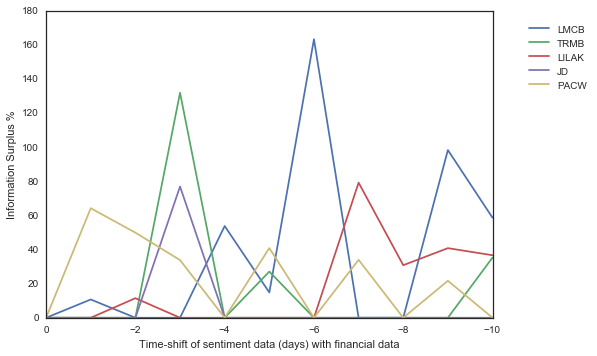

In [83]:
merge_net_mi_res = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'BULL_MINUS_BEAR', 'LOG_RETURN', -1)
merge_net_mi_res_constr = sentisignal.constrain_mi_res(merge_net_mi_res)
merge_net_mi_res_test = sentisignal.constrain_test_significant(merge_net_mi_res_constr, data_nasdaq_top_250_preprocessed_merge, 'BULL_MINUS_BEAR', 'LOG_RETURN')
sentisignal.plot_inf_res(merge_net_mi_res_test, plot_top=5, time_shift=10)
mi_score = merge_net_mi_res_test


error with mi calc cannot convert float NaN to integer
error with mi calc 0
error with mi calc math domain error
error with mi calc math domain error
error with mi calc cannot convert float NaN to integer
error with mi calc cannot convert float NaN to integer
error with mi calc 0
error with mi calc math domain error
error with mi calc math domain error
length prior to constrain 236
length after to constrain 30
ACGL
ACWI
COST
ERIE
FAST
FITB
HAS
INTU
IONS
JD
KHC
LBRDA
LBTYB
LILA
LILAK
LMCB
MAR
MRKT
PBCT
PPC
QQQ
SBAC
SCZ
SHPG
TEAM
TRMB
VCIT
VCSH
VIP
ZG
length after to test 23


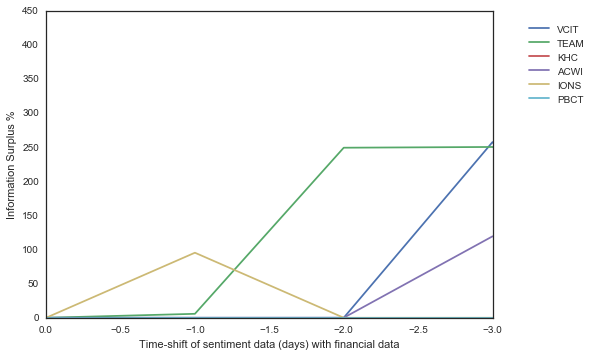

In [96]:
merge_net_mi_res = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge, 'SYMBOL', sentisignal.net_information_surplus, 10, 'TOTAL_SCANNED_MESSAGES', 'VOLUME', -1)
merge_net_mi_res_constr = sentisignal.constrain_mi_res(merge_net_mi_res)
merge_net_mi_res_test = sentisignal.constrain_test_significant(merge_net_mi_res_constr, data_nasdaq_top_250_preprocessed_merge, 'TOTAL_SCANNED_MESSAGES', 'VOLUME')
sentisignal.plot_inf_res(merge_net_mi_res_test, plot_top=5, time_shift=10)
mi_vol = merge_net_mi_res_test


### Clustering

In [91]:
sent_feat = ['SYMBOL', 'LOG_RETURN', 'BULL_MINUS_BEAR', 'TOTAL_SCANNED_MESSAGES', 'VOLUME', 'PCA_SENTIMENT', 'PCA_FINANCE', 'PCA_SENTIMENT_CHANGE', 'PCA_FINANCE_CHANGE', 'LOG_BULLISHNESS', 'LOG_VOLATILITY_DIFF']
nasdaq_feat =['Symbol', 'MarketCap']

cluster_list = ['MAX_INF_SURP_PCT', 'MAX_MUTUAL_INFORMATION', 'OPTIMAL_LAG', 'MarketCap', 'LOG_RETURN', 'BULL_MINUS_BEAR', 'TOTAL_SCANNED_MESSAGES', 'VOLUME', 'LOG_BULLISHNESS', 'POS_LAG_COUNT', 'LOG_VOLATILITY_DIFF']
attr_list = ['MAX_INF_SURP_PCT', 'MAX_MUTUAL_INFORMATION', 'OPTIMAL_LAG', 'POS_LAG_COUNT', 'MarketCap','BULL_MINUS_BEAR', 'TOTAL_SCANNED_MESSAGES', 'LOG_RETURN', 'VOLUME']


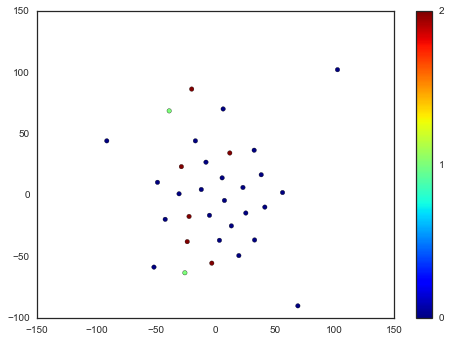

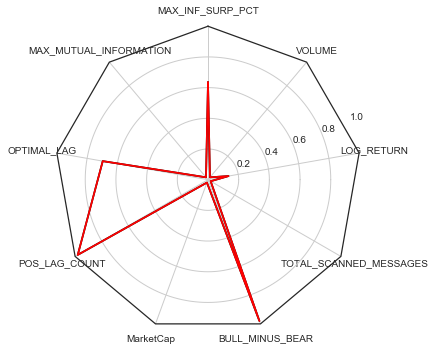

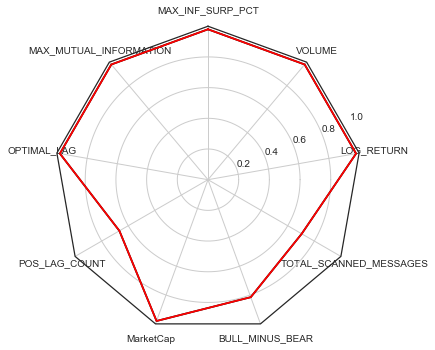

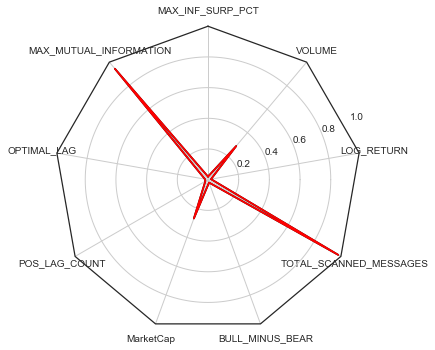

In [112]:
df = mi_pca_sent_pca_fin
res = sentisignal.prep_df_cluster(df, data_nasdaq_company_list, nasdaq_feat, data_nasdaq_top_250_preprocessed_merge, sent_feat)
gb_mean = sentisignal.kmeans(res, cluster_list, attr_list, num_clusters = 3)

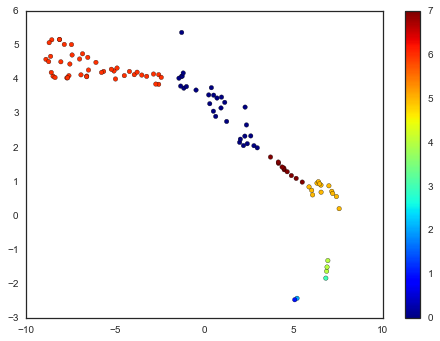

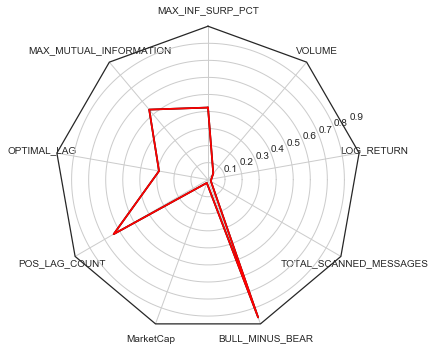

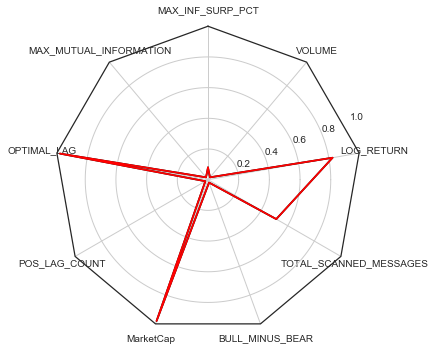

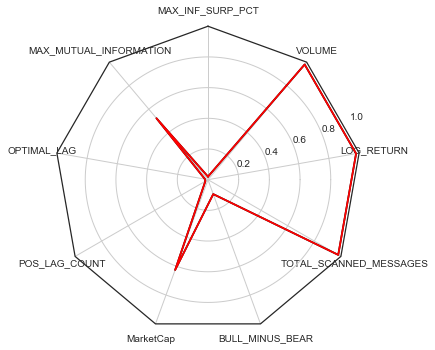

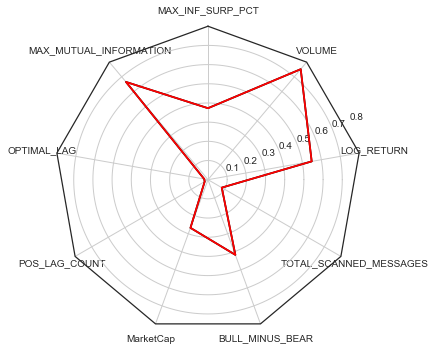

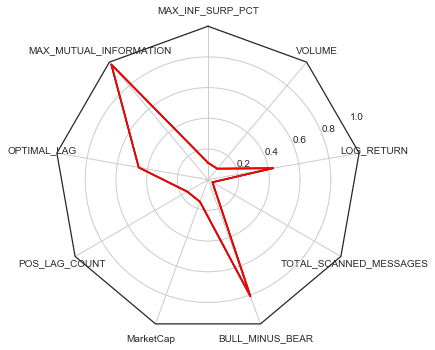

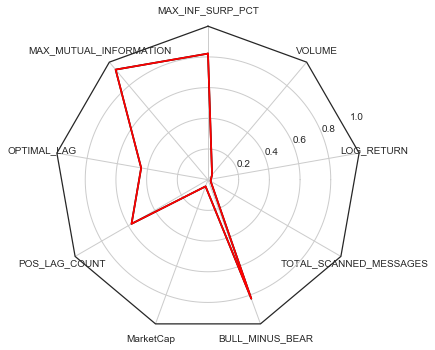

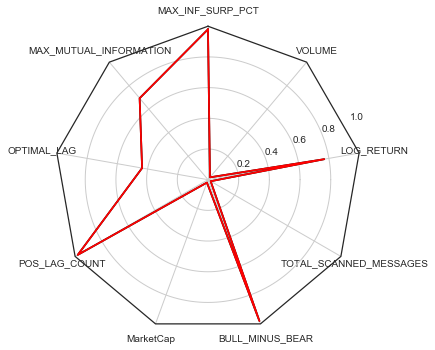

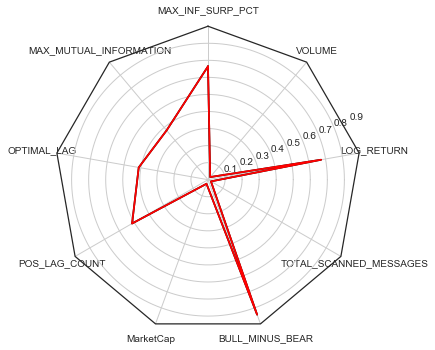

In [93]:
df = mi_pca_sent_change_pca_fin_change
res = sentisignal.prep_df_cluster(df, data_nasdaq_company_list, nasdaq_feat, data_nasdaq_top_250_preprocessed_merge, sent_feat)
res.head()
gb_mean = sentisignal.kmeans(res, cluster_list, attr_list, num_clusters=8)

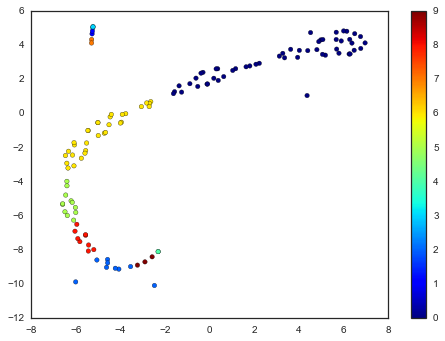

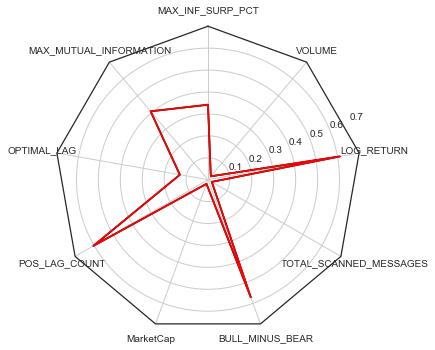

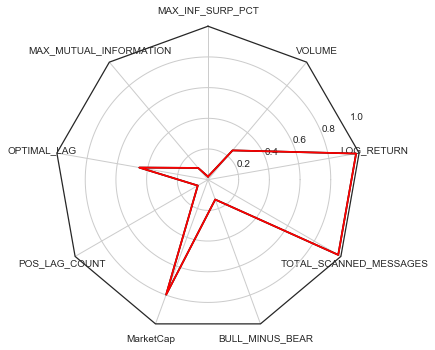

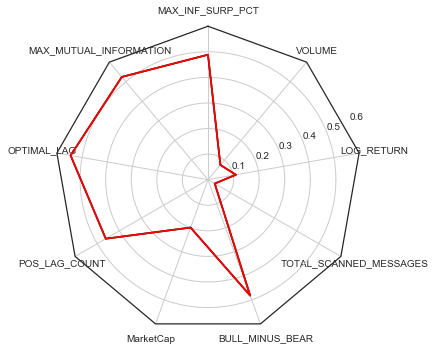

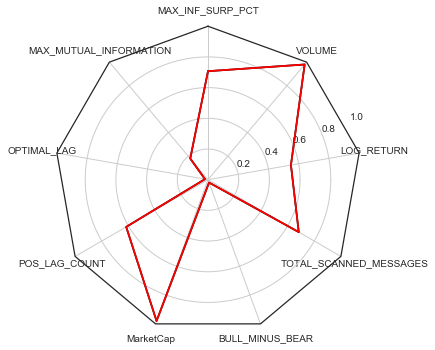

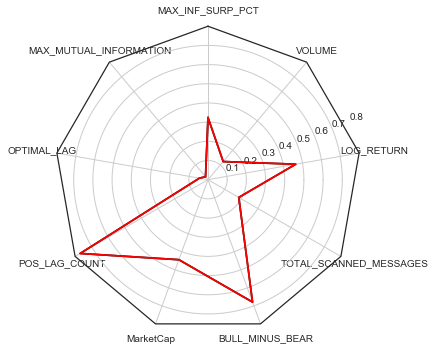

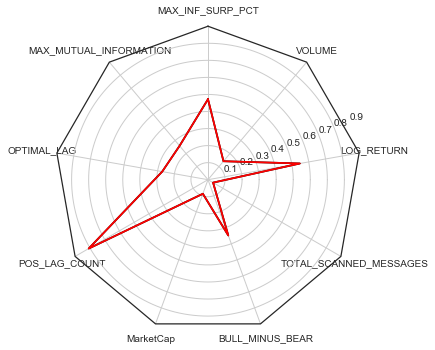

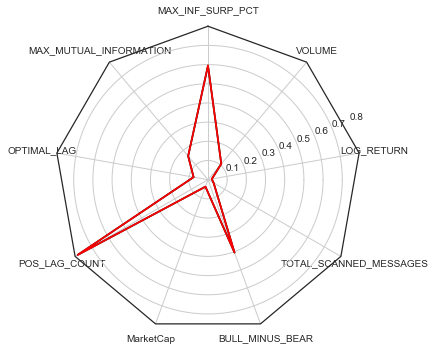

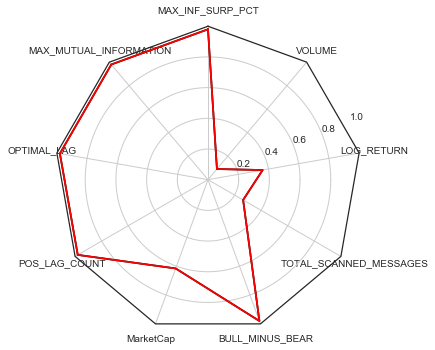

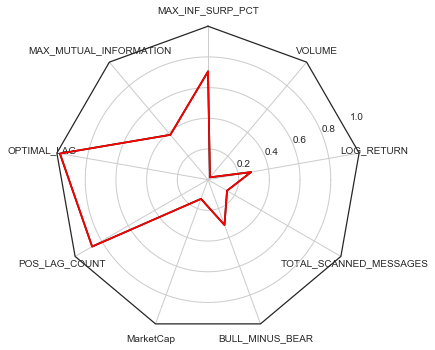

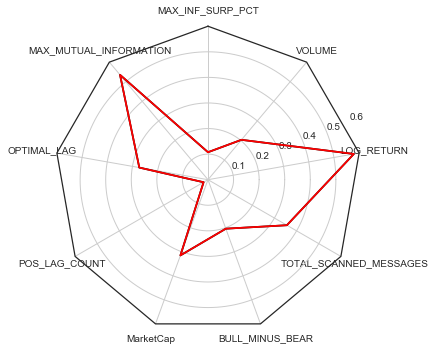

In [95]:
df = mi_score
res = sentisignal.prep_df_cluster(df, data_nasdaq_company_list, nasdaq_feat, data_nasdaq_top_250_preprocessed_merge, sent_feat)
res.head()
gb_mean = sentisignal.kmeans(res, cluster_list, attr_list, num_clusters=10)

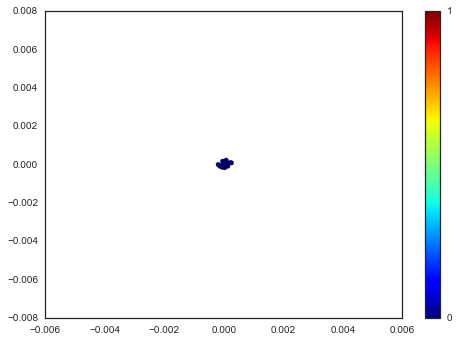

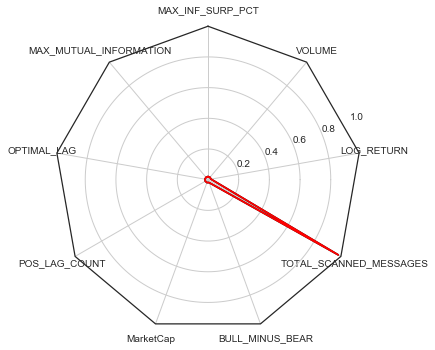

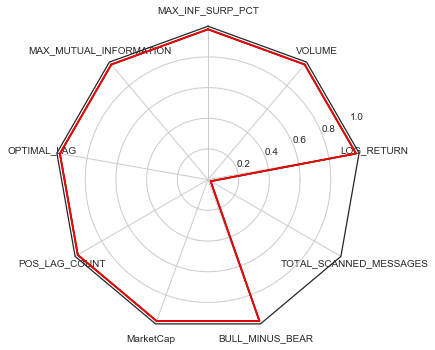

In [97]:
df = mi_vol
res = sentisignal.prep_df_cluster(df, data_nasdaq_company_list, nasdaq_feat, data_nasdaq_top_250_preprocessed_merge, sent_feat)
res.head()
gb_mean = sentisignal.kmeans(res, cluster_list, attr_list, num_clusters=2)

## Data Analytics (with window)

### MI (Mutual Information)

error with mi calc math domain error
error with mi calc math domain error
error with mi calc cannot convert float NaN to integer
error with mi calc cannot convert float NaN to integer
error with mi calc math domain error
error with mi calc math domain error
length prior to constrain 236
length after to constrain 128
ACHC
ACWI
ADBE
ADP
AFSI
ALNY
AMCX
AMGN
AMTD
AMZN
ANSS
ARCC
ATHN
BBRY
BMRN
BRCD
BRKR
CA
CACC
CBSH
CDNS
CDW
CHRW
CINF
CME
COMM
CSCO
CSGP
CSX
CTAS
CTRP
DISCB
DLTR
DXCM
EBAY
EQIX
ERIE
ETFC
EWBC
EXPD
EXPE
FANG
FAST
FB
FITB
GNTX
GOOG
GOOGL
GRMN
HBAN
HDS
HOLX
HSIC
IBKR
IEP
ILMN
INTC
INTU
IONS
JAZZ
JKHY
JUNO
KHC
LAMR
LBRDA
LBTYA
LILA
LILAK
LKQ
LLTC
LMCA
LMCB
LULU
MAR
MDLZ
MDVN
MELI
MIDD
MKTX
MNST
MRKT
MRVL
MSFT
NCLH
NDSN
NTES
NWS
OTEX
PACW
PAYX
PDCO
PPC
QCOM
QGEN
QRVO
ROST
RYAAY
SABR
SATS
SBUX
SCZ
SEIC
SFM
SHPG
SIVB
SNPS
SPLK
SPLS
SRCL
SSNC
STLD
TEAM
TFSL
TRMB
TROW
UHAL
ULTA
ULTI
VCIT
VCSH
VIA
VOD
VXUS
WBA
XRAY
YHOO
ZG
ZION
length after to test 128


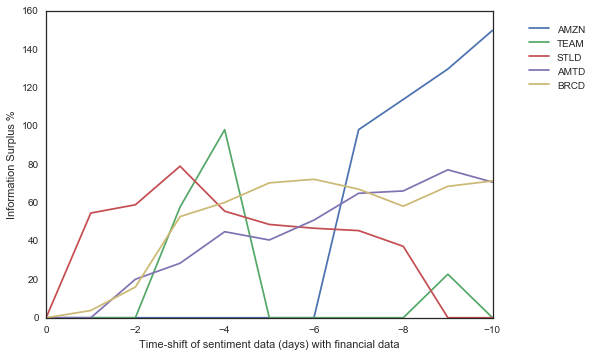

In [99]:
merge_net_mi_res = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge_window_30, 'SYMBOL', sentisignal.net_information_surplus, 10, 'PCA_SENTIMENT_CHANGE', 'PCA_FINANCE_CHANGE', -1)
merge_net_mi_res_constr = sentisignal.constrain_mi_res(merge_net_mi_res)
merge_net_mi_res_test = sentisignal.constrain_test_significant(merge_net_mi_res_constr, data_nasdaq_top_250_preprocessed_merge_window_30, 'PCA_SENTIMENT_CHANGE', 'PCA_FINANCE_CHANGE')
sentisignal.plot_inf_res(merge_net_mi_res_test, plot_top=5, time_shift=10)
mi_pca_sent_change_pca_fin_change_30 = merge_net_mi_res_test

error with mi calc cannot convert float NaN to integer
error with mi calc math domain error
error with mi calc math domain error
error with mi calc cannot convert float NaN to integer
error with mi calc cannot convert float NaN to integer
error with mi calc math domain error
error with mi calc math domain error
length prior to constrain 236
length after to constrain 180


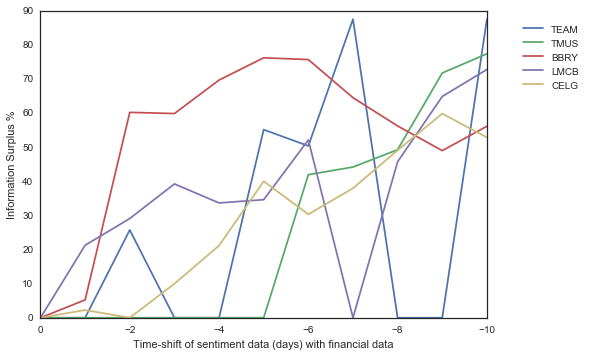

In [120]:
# def shift
data_nasdaq_top_250_preprocessed_window_30_mi_res_net = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge_window_30, 'SYMBOL', sentisignal.net_information_surplus, 10, 'BULL_MINUS_BEAR', 'LOG_RETURN', -1)
data_nasdaq_top_250_preprocessed_window_30_mi_res_net_constrained = sentisignal.constrain_mi_res(data_nasdaq_top_250_preprocessed_window_30_mi_res_net)
sentisignal.plot_inf_res(data_nasdaq_top_250_preprocessed_window_30_mi_res_net_constrained, plot_top=5, time_shift=10)
mi_score_30 = data_nasdaq_top_250_preprocessed_window_30_mi_res_net_constrained

### Clustering

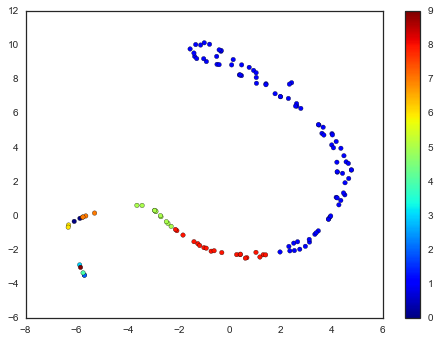

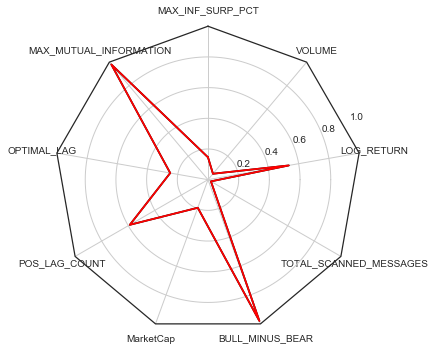

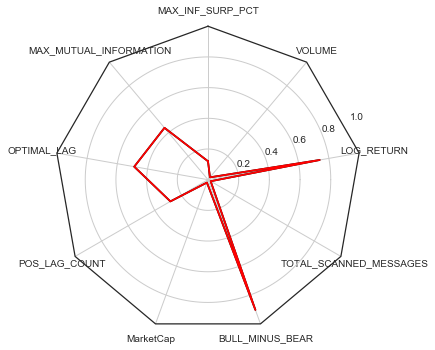

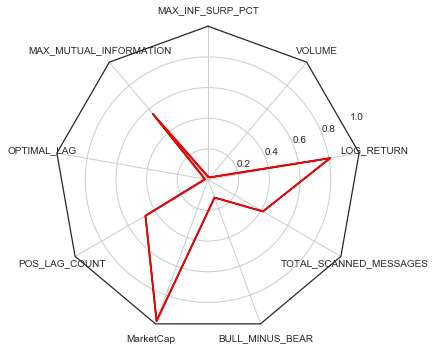

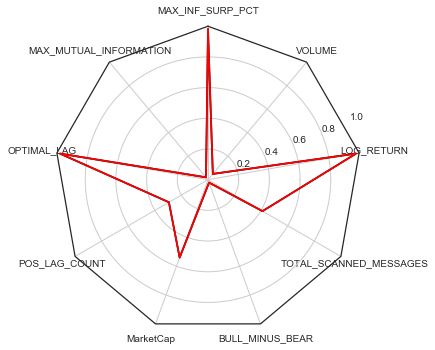

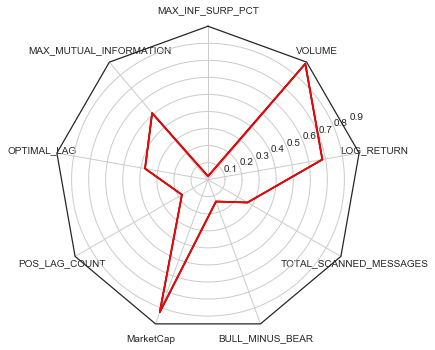

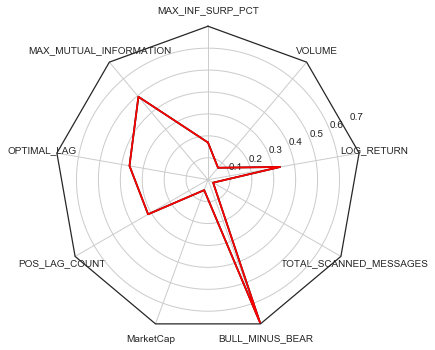

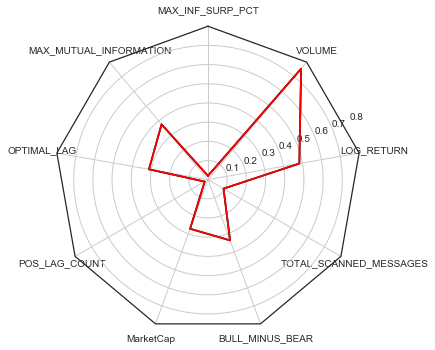

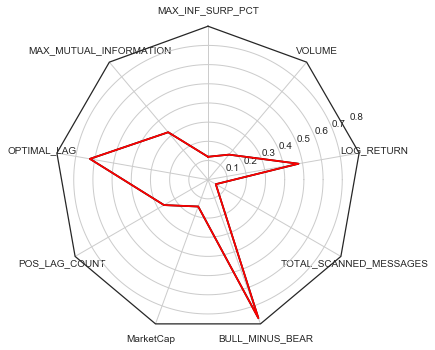

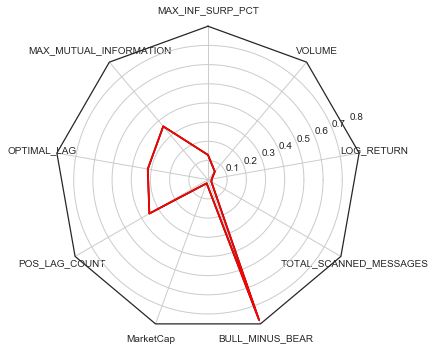

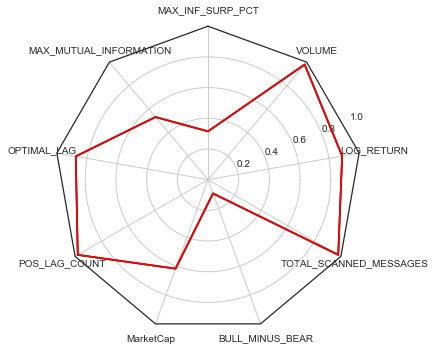

In [101]:
df = mi_pca_sent_change_pca_fin_change_30
res = sentisignal.prep_df_cluster(df, data_nasdaq_company_list, nasdaq_feat, data_nasdaq_top_250_preprocessed_merge, sent_feat)
res.head()
gb_mean = sentisignal.kmeans(res, cluster_list, attr_list, num_clusters=10)

## 10 days

error with mi calc math domain error
error with mi calc math domain error
error with mi calc cannot convert float NaN to integer
error with mi calc cannot convert float NaN to integer
error with mi calc math domain error
error with mi calc math domain error
length prior to constrain 236
length after to constrain 111
ACGL
AMCX
AMGN
AMTD
ANSS
ARCC
ATVI
BEAV
CACC
CBOE
CBSH
CDNS
CDW
CERN
CHTR
CINF
CME
COMM
COST
CSCO
CSGP
CSX
CTAS
CTSH
DISCB
DISCK
DXCM
ERIE
ETFC
EWBC
EXPD
FB
FFIV
FITB
FLIR
FOXA
GOOGL
HSIC
IBKR
INCY
INTC
IONS
JBHT
JKHY
KHC
KLAC
LAMR
LBRDA
LBTYB
LBTYK
LILAK
LKQ
LLTC
LMCB
LRCX
MAR
MDVN
MELI
MIDD
MNST
MRKT
MU
MXIM
NCLH
NDSN
NTES
NTRS
NWSA
OTEX
PACW
PAYX
PBCT
PDCO
PPC
QGEN
QQQ
QRVO
QVCA
REGN
RYAAY
SABR
SBAC
SBNY
SCZ
SEIC
SFM
SHPG
SIRI
SIVB
SNPS
SPLS
SRCL
SSNC
SYMC
TEAM
TMUS
TROW
UHAL
ULTI
UTHR
VCIT
VCSH
VIA
VIP
VOD
VRSK
VXUS
WBA
XRAY
YHOO
ZG
length after to test 111


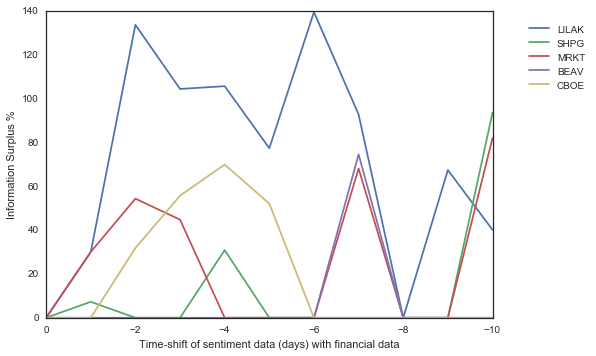

In [113]:
merge_net_mi_res = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge_window_10, 'SYMBOL', sentisignal.net_information_surplus, 10, 'PCA_SENTIMENT_CHANGE', 'PCA_FINANCE_CHANGE', -1)
merge_net_mi_res_constr = sentisignal.constrain_mi_res(merge_net_mi_res)
merge_net_mi_res_test = sentisignal.constrain_test_significant(merge_net_mi_res_constr, data_nasdaq_top_250_preprocessed_merge_window_10, 'PCA_SENTIMENT_CHANGE', 'PCA_FINANCE_CHANGE')
sentisignal.plot_inf_res(merge_net_mi_res_test, plot_top=5, time_shift=10)
mi_pca_sent_change_pca_fin_change_10 = merge_net_mi_res_test

error with mi calc cannot convert float NaN to integer
error with mi calc math domain error
error with mi calc math domain error
error with mi calc cannot convert float NaN to integer
error with mi calc cannot convert float NaN to integer
error with mi calc math domain error
error with mi calc math domain error
length prior to constrain 236
length after to constrain 184
AAL
AAPL
ACHC
ADBE
AFSI
AGNC
AKAM
ALGN
ALKS
ALNY
ALXN
AMCX
AMGN
AMZN
ANSS
ARCC
ARMH
ATHN
ATVI
BBBY
BBRY
BIDU
BIIB
BMRN
BRKR
CA
CBOE
CBSH
CDNS
CDW
CELG
CERN
CHKP
CHRW
CHTR
CINF
CMCSA
CME
COMM
COST
CSCO
CTSH
CTXS
DISCA
DISCB
DISH
DLTR
DNKN
DXCM
EA
EBAY
EQIX
ERIE
ETFC
EWBC
EXPD
EXPE
FANG
FAST
FB
FFIV
FISV
FITB
FOXA
FTNT
FTR
GILD
GNTX
GOOG
GRMN
GT
HAS
HBAN
HDS
HOLX
HSIC
IBB
IBKR
IDXX
IEP
INCY
INTC
INTU
ISRG
JAZZ
JBLU
JD
KHC
KLAC
LAMR
LBTYA
LBTYB
LBTYK
LILAK
LKQ
LLTC
LMCA
LMCB
LRCX
LULU
LVNTA
MANH
MAR
MAT
MCHP
MDLZ
MELI
MNST
MRKT
MRVL
MSFT
MXIM
MYL
NCLH
NDAQ
NDSN
NFLX
NTAP
NTES
NVDA
NWS
NWSA
NXPI
ODFL
ORLY
PACW
PBCT
PCAR
PCL

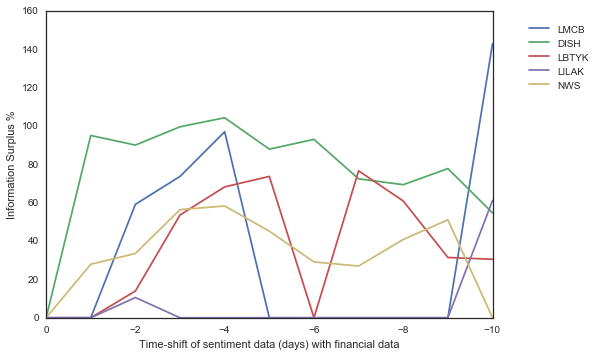

In [119]:
merge_net_mi_res = sentisignal.split_apply_combine(data_nasdaq_top_250_preprocessed_merge_window_10, 'SYMBOL', sentisignal.net_information_surplus, 10, 'BULL_MINUS_BEAR', 'LOG_RETURN', -1)
merge_net_mi_res_constr = sentisignal.constrain_mi_res(merge_net_mi_res)
merge_net_mi_res_test = sentisignal.constrain_test_significant(merge_net_mi_res_constr, data_nasdaq_top_250_preprocessed_merge_window_10, 'BULL_MINUS_BEAR', 'LOG_RETURN')
sentisignal.plot_inf_res(merge_net_mi_res_test, plot_top=5, time_shift=10)
mi_score_10 = merge_net_mi_res_test

### clustering

ValueError: Length of values does not match length of index

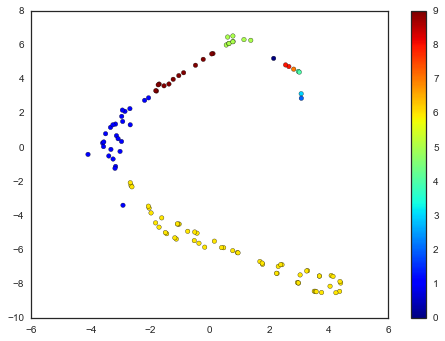

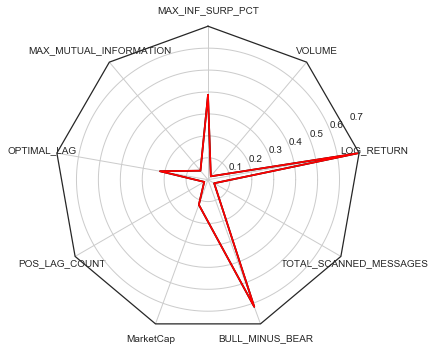

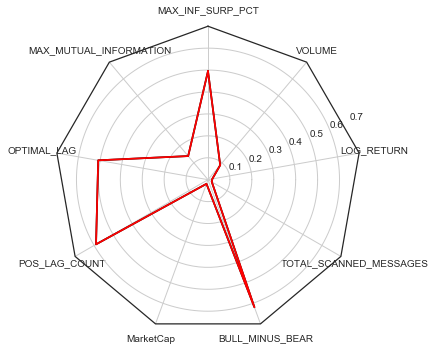

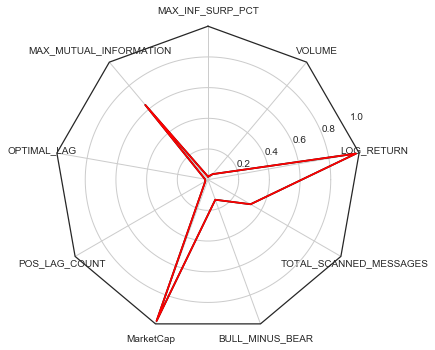

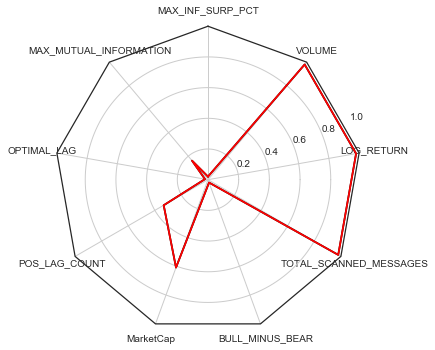

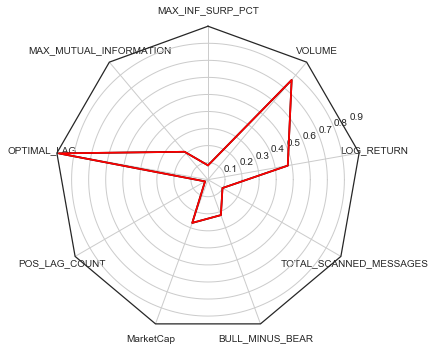

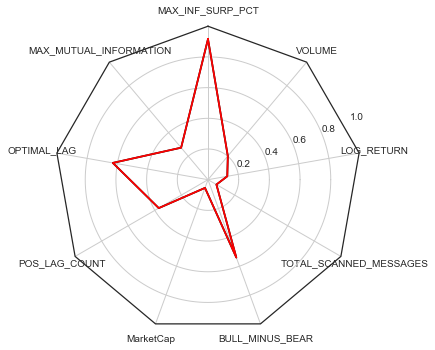

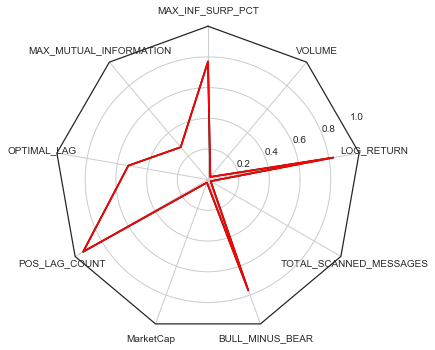

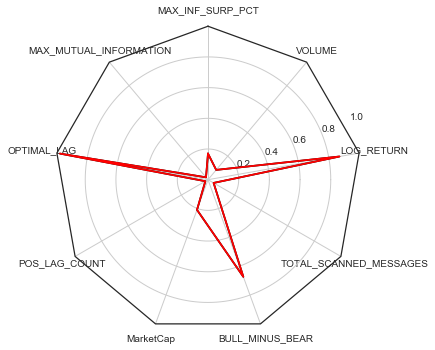

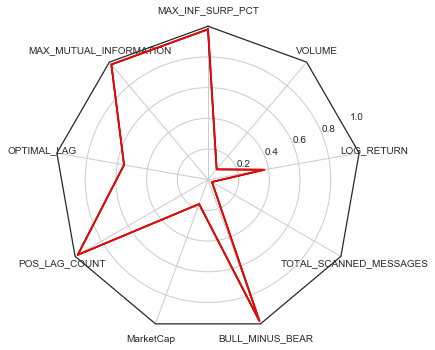

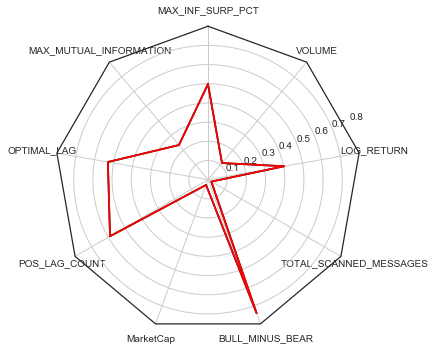

In [117]:
df = mi_pca_sent_change_pca_fin_change_10
res = sentisignal.prep_df_cluster(df, data_nasdaq_company_list, nasdaq_feat, data_nasdaq_top_250_preprocessed_merge, sent_feat)
res.head()
gb_mean = sentisignal.kmeans(res, cluster_list, attr_list, num_clusters=10)

In [118]:
mi_pca_sent_change_pca_fin_change_10.head()

INFORMATION_SURPLUS_DIFF  INFORMATION_SURPLUS_PCT  \
SYMBOL                                                        
ACGL   0                  0.000000                 0.000000   
       1                 -0.001752                 0.000000   
       2                  0.007599                16.252252   
       3                 -0.004715                 0.000000   
       4                  0.000342                 0.000000   

          MUTUAL_INFORMATION  SHIFT  TEST_PCT  
SYMBOL                                         
ACGL   0            0.046755      0       100  
       1            0.045003     -1       100  
       2            0.054354     -2       100  
       3            0.042040     -3       100  
       4            0.047097     -4       100

ValueError: Length of values does not match length of index

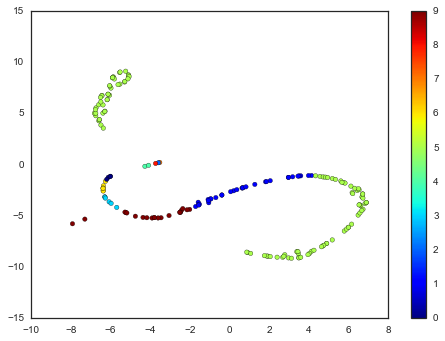

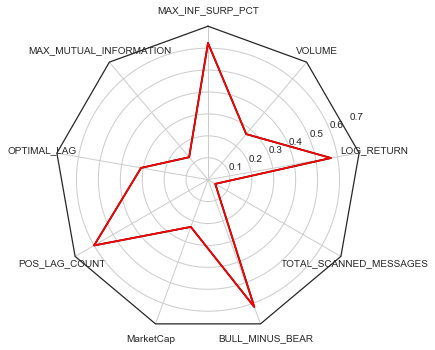

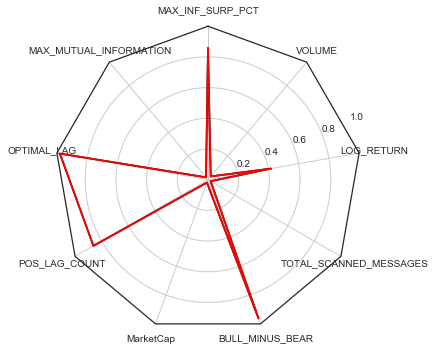

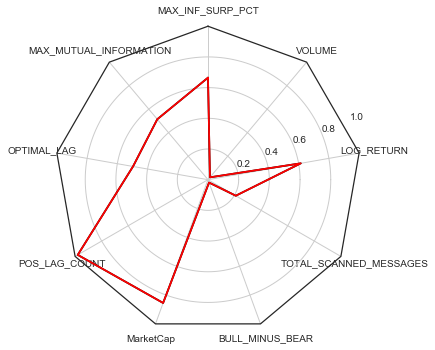

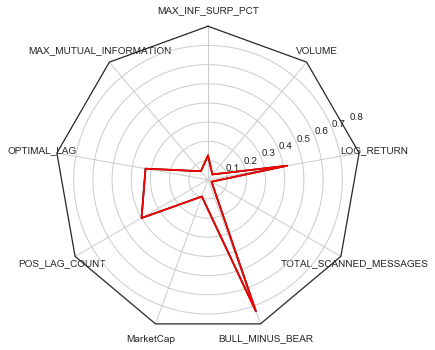

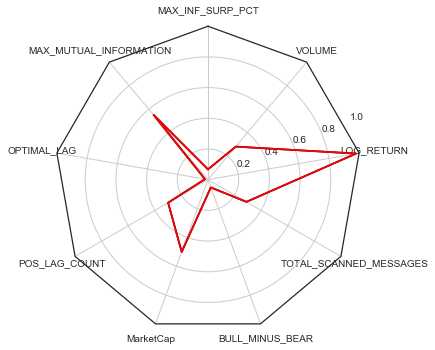

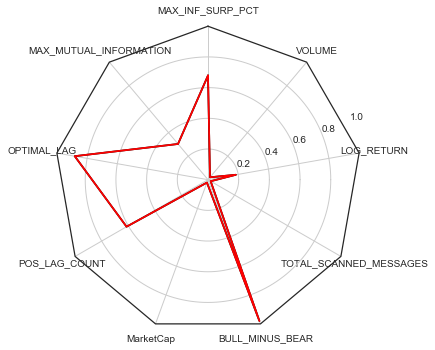

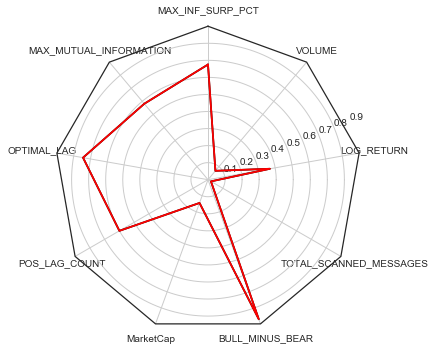

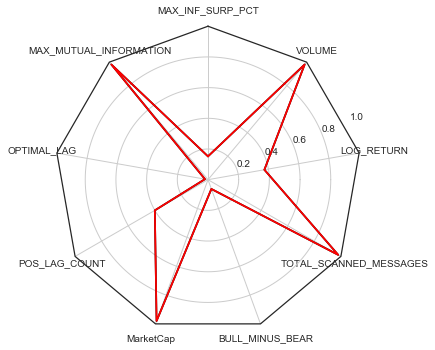

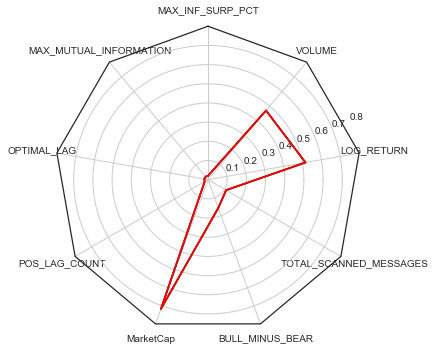

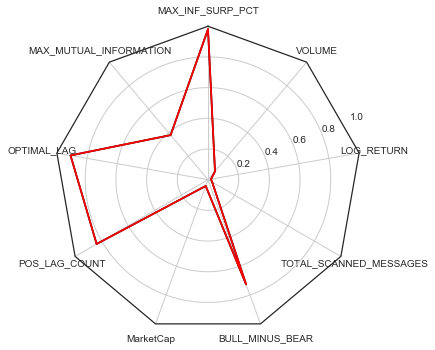

In [122]:
df = mi_score_10
res = sentisignal.prep_df_cluster(df, data_nasdaq_company_list, nasdaq_feat, data_nasdaq_top_250_preprocessed_merge, sent_feat)
res.head()
gb_mean = sentisignal.kmeans(res, cluster_list, attr_list, num_clusters=10)

### Save results

In [116]:
dir_pickle = data_pickles_path
mi_pca_sent_pca_fin.to_pickle(dir_pickle+'info_surp_res/'+'mi_pca_sent_pca_fin')
mi_pca_sent_change_pca_fin_change.to_pickle(dir_pickle+'info_surp_res/'+'mi_pca_sent_change_pca_fin_change')
mi_pca_sent_change_pca_fin_change_10.to_pickle(dir_pickle+'info_surp_res/'+'mi_pca_sent_change_pca_fin_change_10')
mi_pca_sent_change_pca_fin_change_30.to_pickle(dir_pickle+'info_surp_res/'+'mi_pca_sent_change_pca_fin_change_30')
mi_score.to_pickle(dir_pickle+'info_surp_res/'+'mi_score')
mi_vol.to_pickle(dir_pickle+'info_surp_res/'+'mi_vol')
mi_pca_sent_change_pca_fin_change.to_pickle(dir_pickle+'info_surp_res'+'mi_pca_sent_change_pca_fin_change')

In [121]:
dir_pickle = data_pickles_path
mi_score_10.to_pickle(dir_pickle+'info_surp_res/'+'mi_score_10')
mi_score_30.to_pickle(dir_pickle+'info_surp_res/'+'mi_score_30')